In [340]:
from src.preprocessing_modules import *
from src.preprocessing_2 import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import umap
import pymde
import torch
import seaborn as sns
sns.set_theme(style='white')
import plotly.express as px
from sklearn.decomposition import PCA

In [262]:
# Set the random seed
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)   
tf.config.experimental.enable_op_determinism()

In [261]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## GSE128639
PBMC CITE-seq with 25 antibodies describe in ADT

In [302]:
data_directory = 'Sample Datasets/GSE128639'
metadata, pro, rna, cite_data = load_data(data_directory)
obj = Rdata()

Reading Data in Sample Datasets/GSE128639/

Found protein, meta, rna data!


#### CITE-seq with Deep-N-Omics

In [293]:
# run model 
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'GSE128639_test','gene_pro', epochs=20, override = True)

Epoch 1/20
959/959 [==============================] - 13s 11ms/step - loss: 1.5583 - gene_decoder_last_loss: 0.7133 - protein_decoder_last_loss: 0.8450 - val_loss: 1.3457 - val_gene_decoder_last_loss: 0.6782 - val_protein_decoder_last_loss: 0.6676
Epoch 2/20
959/959 [==============================] - 11s 11ms/step - loss: 1.3166 - gene_decoder_last_loss: 0.6760 - protein_decoder_last_loss: 0.6406 - val_loss: 1.2792 - val_gene_decoder_last_loss: 0.6712 - val_protein_decoder_last_loss: 0.6080
Epoch 3/20
959/959 [==============================] - 12s 12ms/step - loss: 1.2806 - gene_decoder_last_loss: 0.6707 - protein_decoder_last_loss: 0.6099 - val_loss: 1.2622 - val_gene_decoder_last_loss: 0.6663 - val_protein_decoder_last_loss: 0.5959
Epoch 4/20
959/959 [==============================] - 11s 12ms/step - loss: 1.2668 - gene_decoder_last_loss: 0.6671 - protein_decoder_last_loss: 0.5997 - val_loss: 1.2516 - val_gene_decoder_last_loss: 0.6647 - val_protein_decoder_last_loss: 0.5869
Epoch 5/

INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [297]:
GSE128639_GP = makeObj([rna, pro],bottleneck, metadata,"celltype.l2")

959/959 [==============================] - 3s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [337]:
obj.gene_protein = GSE128639_GP

#### RNA-seq with AE

In [305]:
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'GSE128639_test', 'gene_only',epochs=20, override = True)

Epoch 1/20
959/959 [==============================] - 14s 13ms/step - loss: 0.7170 - val_loss: 0.6777
Epoch 2/20
959/959 [==============================] - 11s 11ms/step - loss: 0.6748 - val_loss: 0.6674
Epoch 3/20
959/959 [==============================] - 10s 11ms/step - loss: 0.6668 - val_loss: 0.6600
Epoch 4/20
959/959 [==============================] - 12s 12ms/step - loss: 0.6613 - val_loss: 0.6563
Epoch 5/20
959/959 [==============================] - 11s 11ms/step - loss: 0.6572 - val_loss: 0.6511
Epoch 6/20
959/959 [==============================] - 11s 11ms/step - loss: 0.6540 - val_loss: 0.6486
Epoch 7/20
959/959 [==============================] - 13s 13ms/step - loss: 0.6514 - val_loss: 0.6459
Epoch 8/20
959/959 [==============================] - 11s 11ms/step - loss: 0.6491 - val_loss: 0.6433
Epoch 9/20
959/959 [==============================] - 12s 13ms/step - loss: 0.6472 - val_loss: 0.6418
Epoch 10/20
959/959 [==============================] - 13s 13ms/step - loss: 0.645

INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


INFO:tensorflow:Assets written to: saved_models/GSE128639_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [306]:
GSE128639_GO = makeObj(rna, bottleneck, metadata, "celltype.l2")

959/959 [==============================] - 2s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [338]:
obj.gene_only = GSE128639_GO

#### CITE-seq with PCA

In [343]:
GSE128639_PCA = PCAobj(cite_data, metadata, "celltype.l2")

/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [344]:
obj.cite_pca = GSE128639_PCA

#### Control

In [355]:
GSE128639_control = makeObj(cite_data, None, metadata,"celltype.l2" )

In [356]:
obj.control = GSE128639_control

#### Plot All

gene_protein 0.9103742827334377
gene_only 0.737121804903495
cite_pca 0.6674165362545644
control 0.26874673969744395


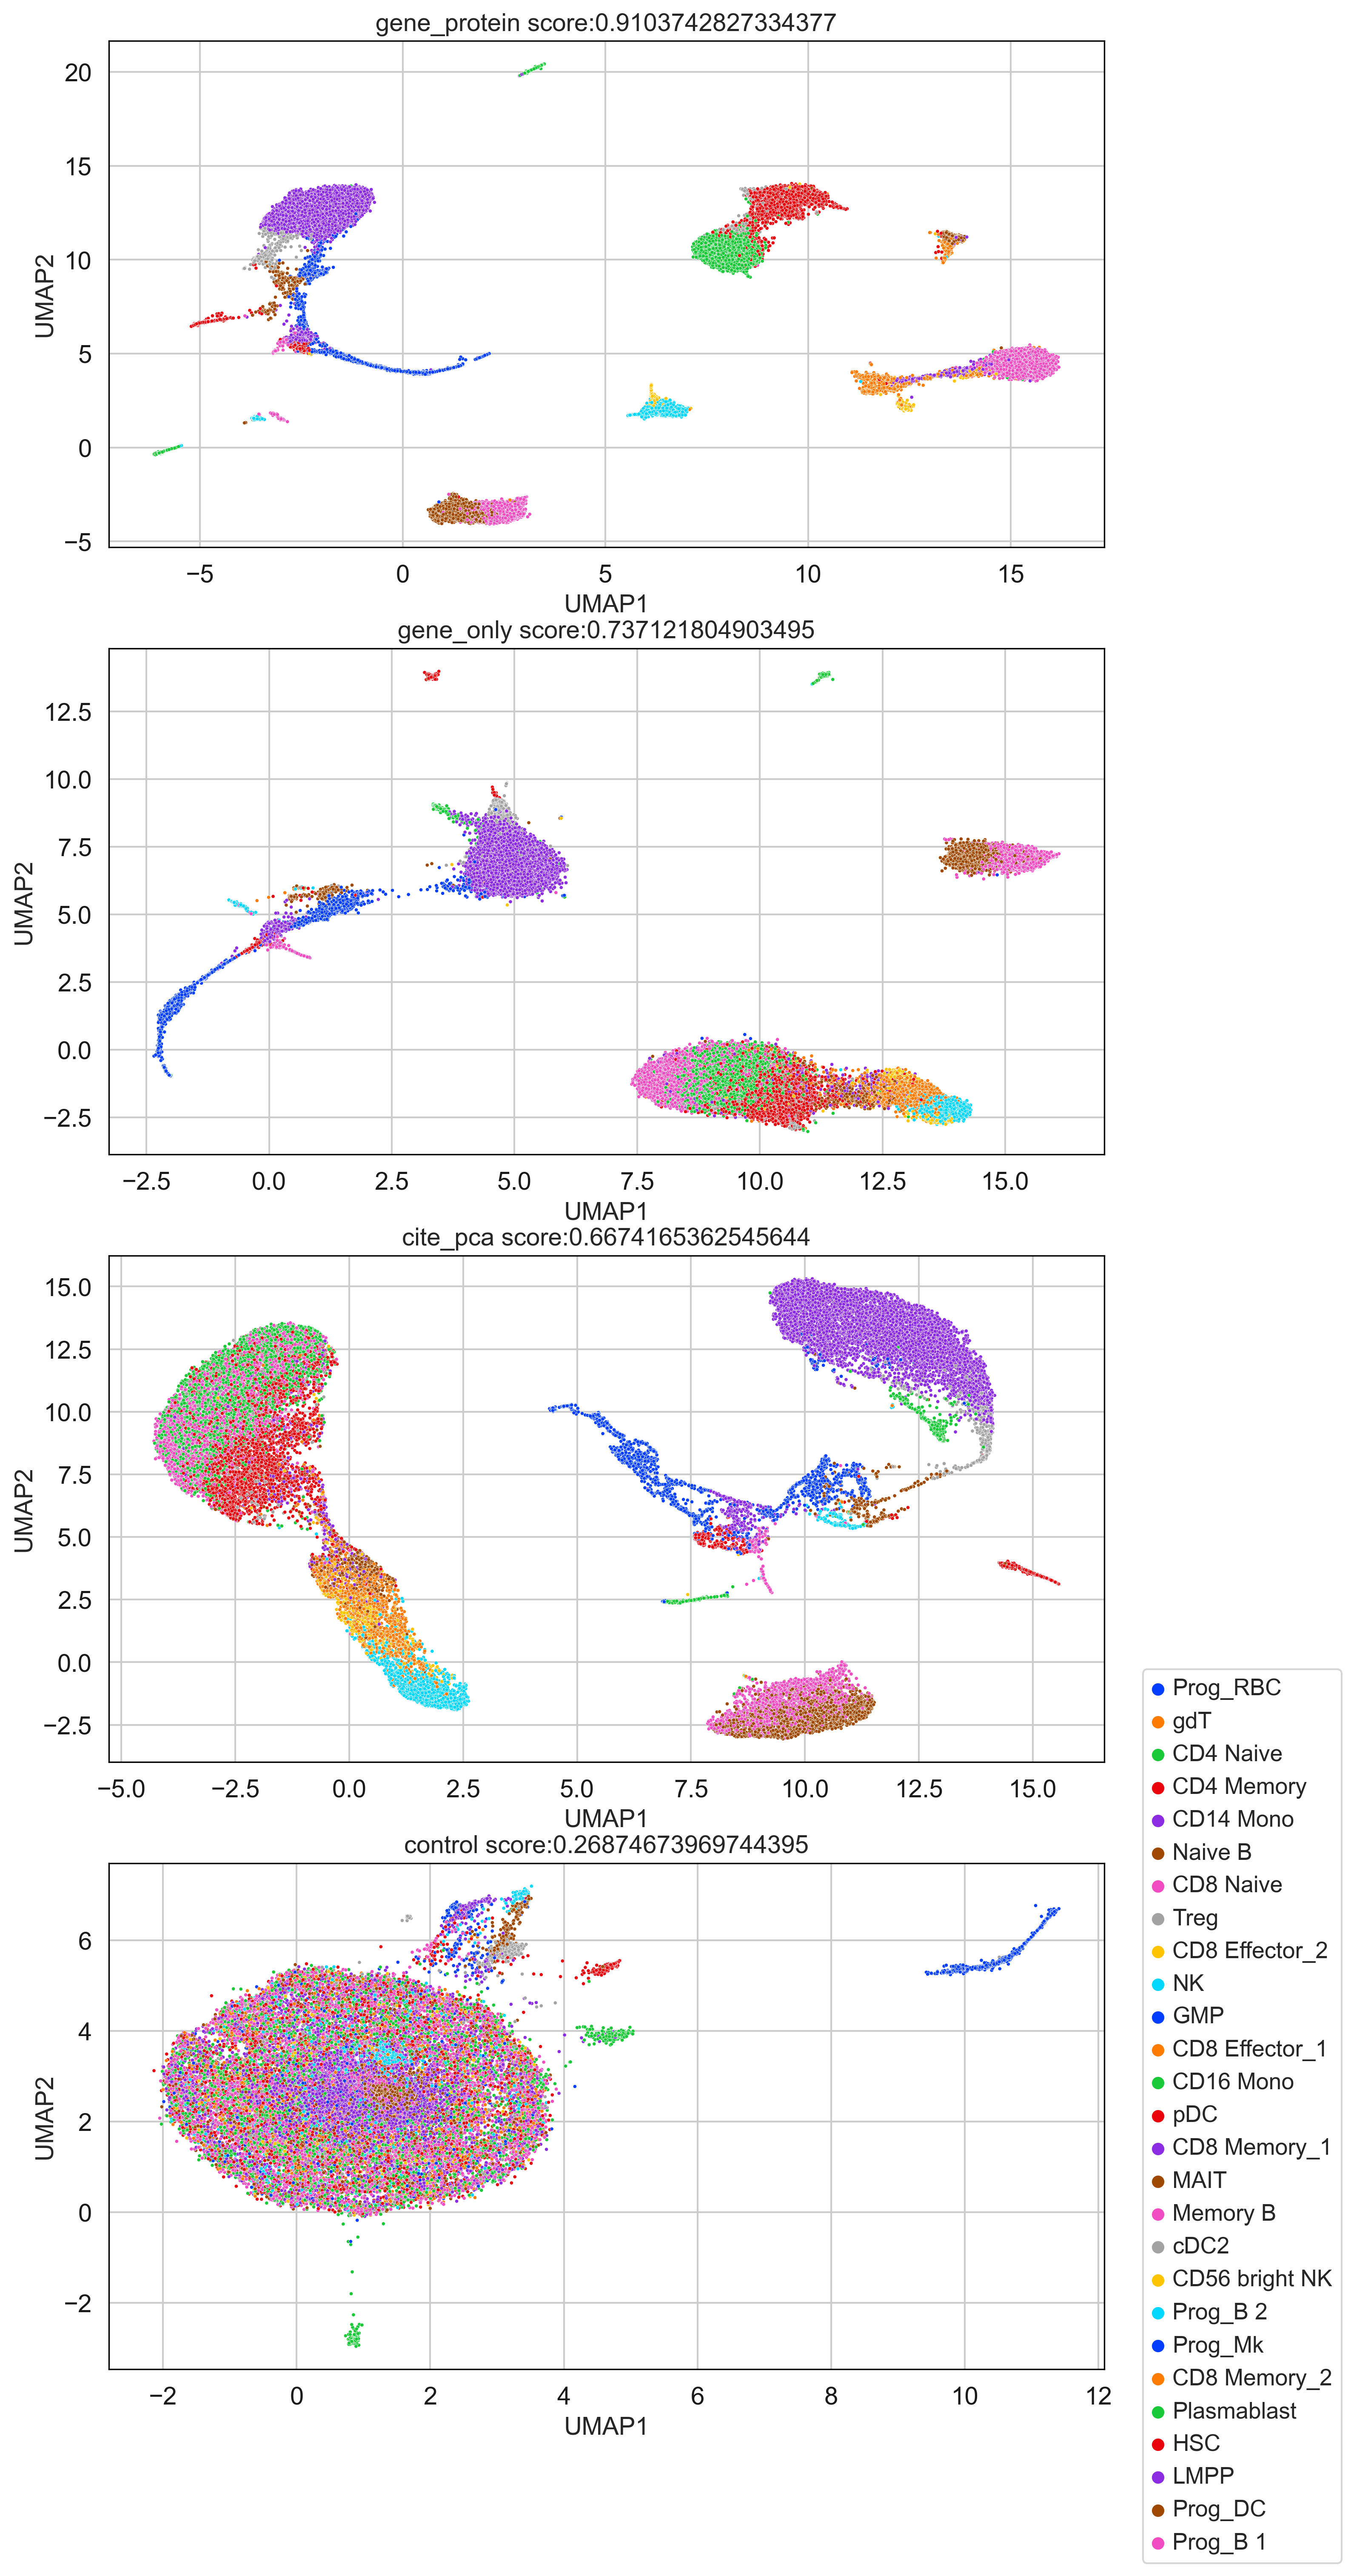

In [357]:
plotObjs(obj, metadata, "celltype.l2")

### GSE100866
CBMC CITE-seq with 13 antibodies describe in ADT.
We will use this as a example of manual data loading

In [358]:
# User specify dataset (each column is a gene/metadata feature and each row is a cell)
rna = pd.read_csv("Sample Datasets/GSE100866/rna_scale.csv.gz",index_col=0).T
pro = pd.read_csv("Sample Datasets/GSE100866/protein_scale.csv.gz", index_col=0).T
metadata = pd.read_csv("Sample Datasets/GSE100866/metadata.csv.gz",index_col=0)
metadata['cell_barcode'] = metadata.index # to preserve cell barcode

In [359]:
# remove multiplets TT because i forgot to in preprocessing
multiplets = list(metadata[metadata.rna_annotations == "Multiplets"].index)
rna = rna[~rna.index.isin(multiplets)]
pro = pro[~pro.index.isin(multiplets)]
metadata = metadata[~metadata.index.isin(multiplets)]

In [360]:
cite_data = pd.concat([rna, pro], axis = 1)
obj = Rdata()

#### CITE-seq with Deep-N-Omics

In [361]:
# run model 
GPhistory, GPautodecoder, bottleneck = gene_protein_encoder(pro, rna, pro, rna, 64, 'GSE100866_test','gene_pro', epochs=20, override = True)
GSE100866_GP = makeObj([rna, pro],bottleneck, metadata,"rna_annotations")
obj.gene_protein = GSE100866_GP

Epoch 1/20
247/247 [==============================] - 5s 13ms/step - loss: 1.7547 - gene_decoder_last_loss: 0.6991 - protein_decoder_last_loss: 1.0556 - val_loss: 1.6812 - val_gene_decoder_last_loss: 0.6419 - val_protein_decoder_last_loss: 1.0393
Epoch 2/20
247/247 [==============================] - 3s 11ms/step - loss: 1.5054 - gene_decoder_last_loss: 0.6006 - protein_decoder_last_loss: 0.9049 - val_loss: 1.4504 - val_gene_decoder_last_loss: 0.6065 - val_protein_decoder_last_loss: 0.8438
Epoch 3/20
247/247 [==============================] - 3s 12ms/step - loss: 1.3925 - gene_decoder_last_loss: 0.5907 - protein_decoder_last_loss: 0.8018 - val_loss: 1.3374 - val_gene_decoder_last_loss: 0.5851 - val_protein_decoder_last_loss: 0.7523
Epoch 4/20
247/247 [==============================] - 3s 13ms/step - loss: 1.3283 - gene_decoder_last_loss: 0.5845 - protein_decoder_last_loss: 0.7437 - val_loss: 1.2946 - val_gene_decoder_last_loss: 0.5786 - val_protein_decoder_last_loss: 0.7161
Epoch 5/20
2

INFO:tensorflow:Assets written to: saved_models/GSE100866_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSE100866_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSE100866_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


INFO:tensorflow:Assets written to: saved_models/GSE100866_test/gene_pro_NHG2_NHP1_DIV4_EPOCHS20_EncodingDim64_merged/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
247/247 [==============================] - 1s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Epoch 1/20
247/247 [==============================] - 4s 11ms/step - loss: 0.7018 - val_loss: 0.6346
Epoch 2/20
247/247 [==============================] - 2s 9ms/step - loss: 0.6086 - val_loss: 0.5998
Epoch 3/20
247/247 [==============================] - 2s 9ms/step - loss: 0.5953 - val_loss: 0.5895
Epoch 4/20
247/247 [==============================] - 3s 11ms/step - loss: 0.5900 - val_loss: 0.5846
Epoch 5/20
247/247 [==============================] - 3s 12ms/step - loss: 0.5860 - val_loss: 0.5812
Epoch 6/20
247/247 [==============================] - 3s 13ms/step - loss: 0.5828 - val_loss: 0.5765
Epoch 7/20
247/247 [==============================] - 3s 11ms/step - loss: 0.5790 - val_loss: 0.5739
Epoch 8/20
247/247 [==============================] - 2s 10ms/step - loss: 0.5759 - val_loss: 0.5700
Epoch 9/20
247/247 [==============================] - 3s 11ms/step - loss: 0.5731 - val_loss: 0.5673
Epoch 10/20
247/247 [==============================] - 3s 11ms/step - loss: 0.5708 - val_loss

INFO:tensorflow:Assets written to: saved_models/GSE100866_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_auto/assets


INFO:tensorflow:Assets written to: saved_models/GSE100866_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


INFO:tensorflow:Assets written to: saved_models/GSE100866_test/gene_only_NHL2_DIV4_EPOCHS20_EncodingDim64_encoder/assets


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
247/247 [==============================] - 1s 2ms/step


/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ting/opt/anac

gene_protein 0.7967067764407854
gene_only 0.7963267891070298
cite_pca 0.8444585180493983
control 0.668777707409753


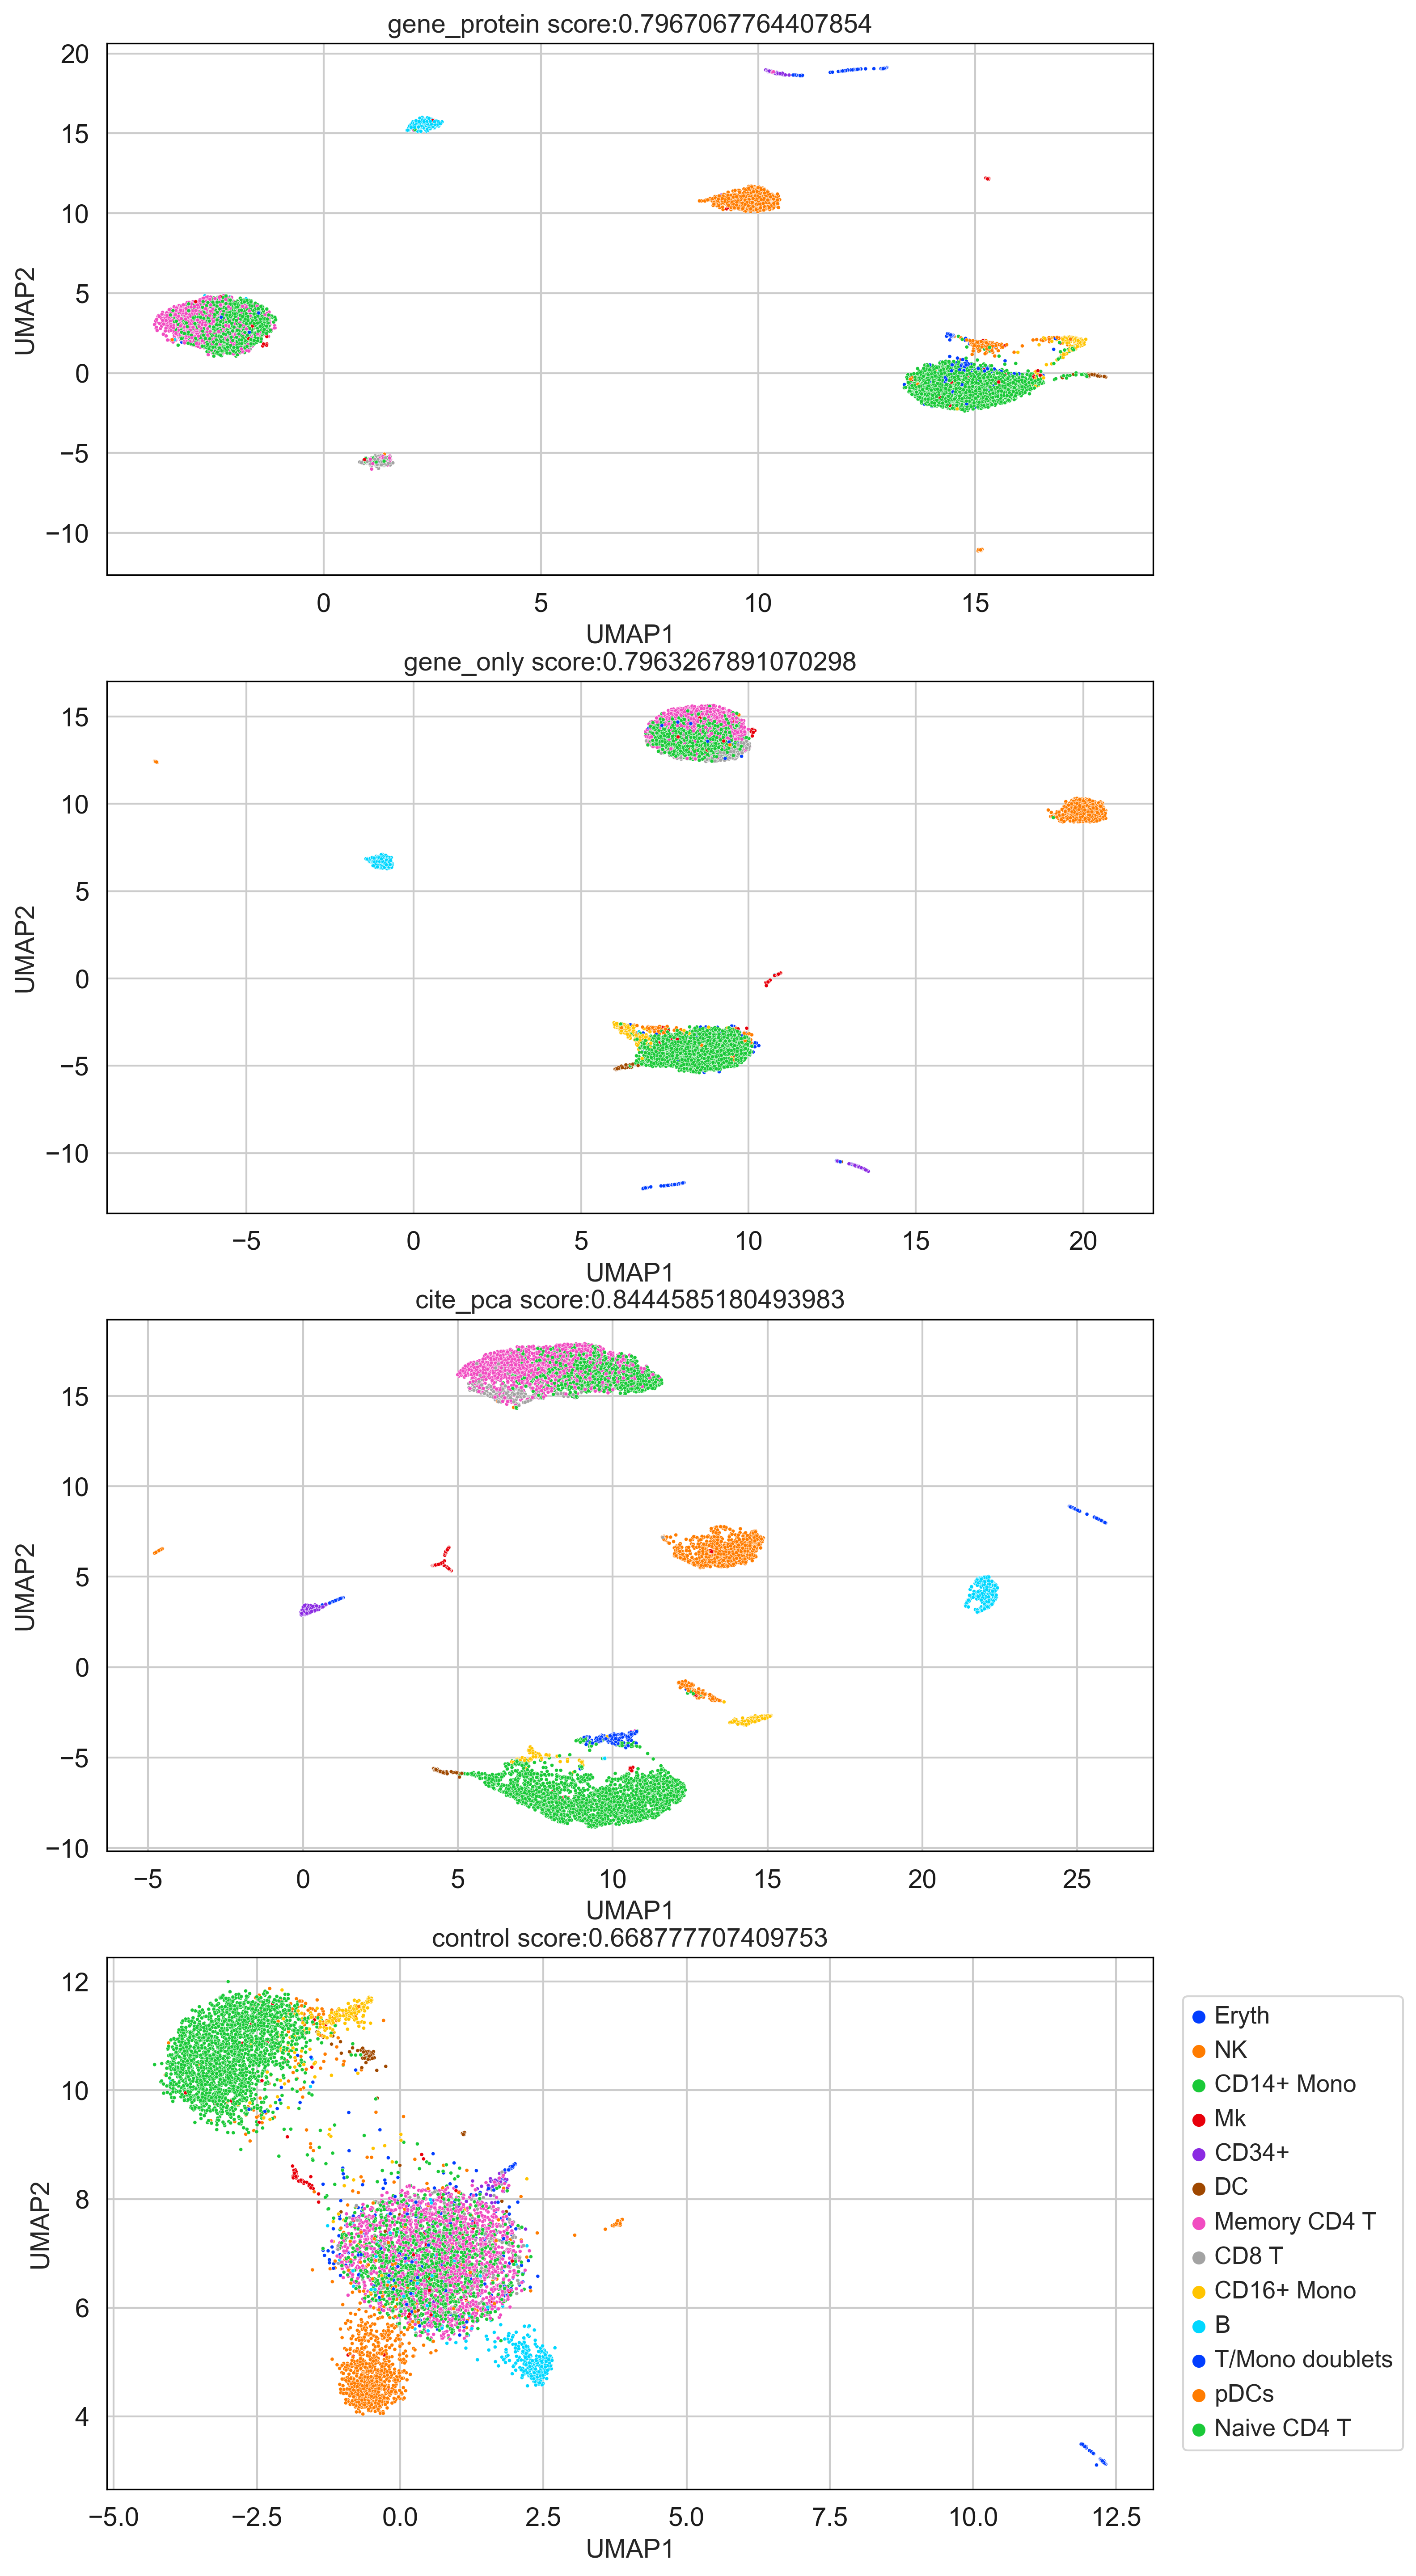

In [363]:
#### RNA-seq with AE
GOhistory, GOautoencoder, bottleneck = gene_only_encoder(rna, rna, 64, 'GSE100866_test', 'gene_only',epochs=20, override = True)
GSE100866_GO = makeObj(rna, bottleneck, metadata, "rna_annotations")
obj.gene_only = GSE100866_GO

#### CITE-seq with PCA
GSE100866_PCA = PCAobj(cite_data, metadata, "rna_annotations")
obj.cite_pca = GSE100866_PCA

#### Control
GSE100866_control = makeObj(cite_data, None, metadata,"rna_annotations" )
obj.control = GSE100866_control

#### Plot All
plotObjs(obj, metadata, "rna_annotations")